This example demonstrates how to generate a checkerboard dataset and bicluster it using the Spectral Biclustering algorithm.

The data is generated with the make_checkerboard function, then shuffled and passed to the Spectral Biclustering algorithm. The rows and columns of the shuffled matrix are rearranged to show the biclusters found by the algorithm.

The outer product of the row and column label vectors shows a representation of the checkerboard structure.

In [24]:
# https://scikit-learn.org/stable/auto_examples/bicluster/plot_spectral_biclustering.html
#
# Author: Kemal Eren <kemal@kemaleren.com>
# License: BSD 3 clause

import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_checkerboard
from sklearn.cluster import SpectralBiclustering
from sklearn.metrics import consensus_score

In [25]:
n_clusters = (4, 3)
data, rows, columns = make_checkerboard(
    shape=(300, 300), n_clusters=n_clusters, noise=10, shuffle=False, random_state=0
)

Text(0.5, 1.0, 'Original dataset')

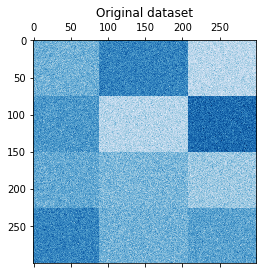

In [26]:
plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Original dataset")

In [27]:
# shuffle clusters
rng = np.random.RandomState(0)
row_idx = rng.permutation(data.shape[0])
col_idx = rng.permutation(data.shape[1])
data = data[row_idx][:, col_idx]

Text(0.5, 1.0, 'Shuffled dataset')

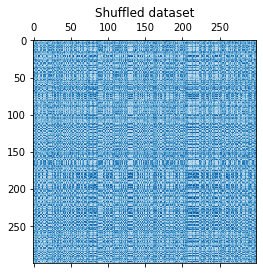

In [28]:
plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Shuffled dataset")

In [29]:
model = SpectralBiclustering(n_clusters=n_clusters, method="log", random_state=0)
model.fit(data)
score = consensus_score(model.biclusters_, (rows[:, row_idx], columns[:, col_idx]))
print("consensus score: {:.1f}".format(score))

consensus score: 1.0


In [30]:
fit_data = data[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

Text(0.5, 1.0, 'After biclustering; rearranged to show biclusters')

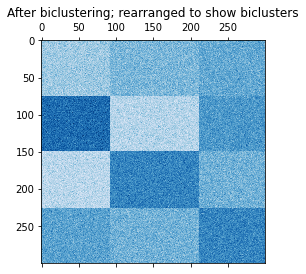

In [31]:
plt.matshow(fit_data, cmap=plt.cm.Blues)
plt.title("After biclustering; rearranged to show biclusters")

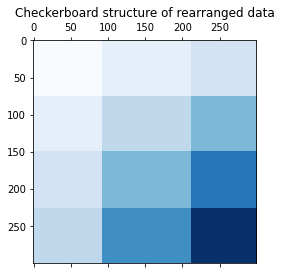

In [32]:
plt.matshow(
    np.outer(np.sort(model.row_labels_) + 1, np.sort(model.column_labels_) + 1),
    cmap=plt.cm.Blues,
)
plt.title("Checkerboard structure of rearranged data")
plt.show()